#Prediction using Supervised ML

**The problem statement:**

.Predict the percentage of an student based on no. of study hours.

This a simple linear rergression as it involves just 2 variables

.Hours

.Exam Score

##Step 1 Load the Dataset
We will load the dataset that contains the following 25 varaiables:

.Total hours studied for some exam

.Exam score

In [ ]:
#import pandas first:
import pandas as pd

#load data:
df=pd.read_csv('/content/student_scores - student_scores.csv')

In [ ]:
#display the first 5 rows of dataframe:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [ ]:
#duplicates:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [ ]:
 #missing values:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##Step 2 Visualise Data
Before we fit a simple linear regression model, we should first visualize the data to gain an understanding of it

In [ ]:
#import matplotlib for viusalising data:
import matplotlib.pyplot as plt


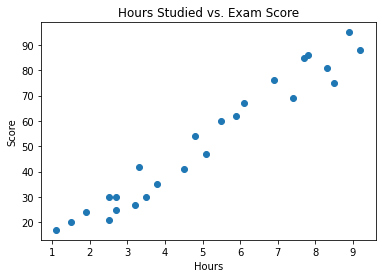

In [ ]:
#create a scatterplot to view the relationship between the two variables:
plt.scatter(df.Hours,df.Scores)
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [ ]:
#From the plot we can see that the relationship does appear to be linear. 
#As hours increases, score tends to increase as well in a linear fashion.

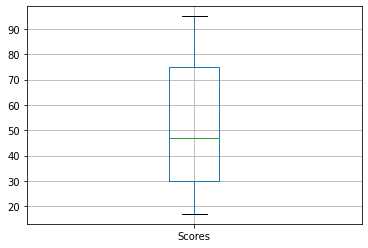

In [ ]:
#create a boxplot to visualize the distribution of exam scores and check for outliers:
df.boxplot(column=['Scores'])

In [ ]:
#There are no tiny circles in the boxplot, which means there are no outliers in our dataset.

##Step3 Perform Simple Linear Regression
Once we’ve confirmed that the relationship between our variables is linear and that there are no outliers present,

we can proceed to fit a simple linear regression model using hours as the explanatory variable and score as the response variable:

In [ ]:
#Split data into explanatory and response variable:

#define response variable:
y=df['Scores']

#define explanatory variable:
x=df[['Hours']]

In [ ]:
#import statsmodel:
import statsmodels.api as sm

#add constant to predictor variables:
x = sm.add_constant(x)

#fit linear regression model:
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           9.13e-17
Time:                        11:15:11   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

In [ ]:
#From the model summary we can see that the fitted regression equation is:
Score=2.4837+9.7758*(hours)

In [ ]:
#This means that each additional hour studied is associated with an average
#increase in exam score of 9.7758 points.
#And the intercept value of 2.4837 tells us the average
#expected exam score for a student who studies zero hours.

**We can look at what will be a predicted score if student studies for 9.25hrs/day ?**

In [ ]:
Score=2.4837+9.7758*(9.25)
Score

92.90985

In [ ]:
#A student who studies for 9.25 hours is expected to receive an exam score of 92.90985

##Step Create a Residual Plots

After we’ve fit the simple linear regression model to the data, the last step is to create residual plots.

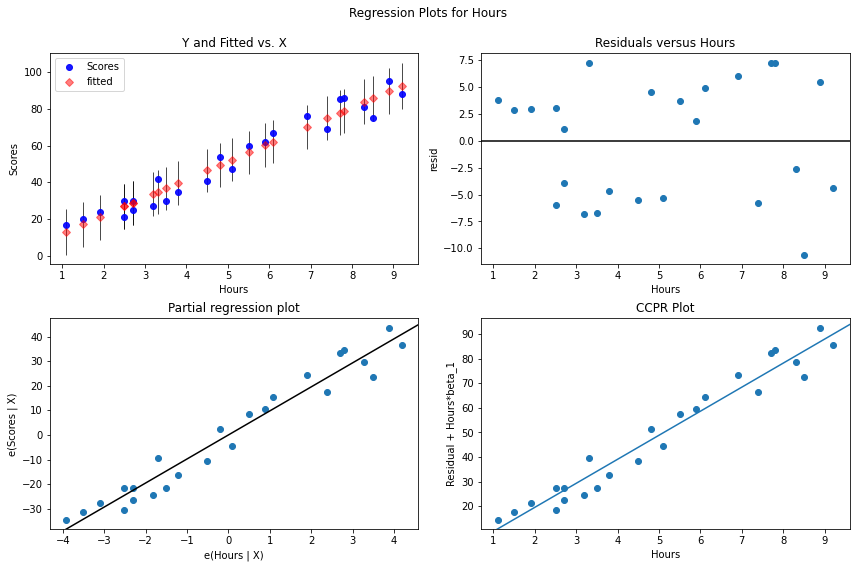

In [ ]:
#Residual vs. fitted values plot:

#define figure size
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'Hours', fig=fig)

**Interpreting graphs**

1. The one in the top right corner is the residual vs. fitted plot. 

The x-axis on this plot shows the actual values for the predictor variable points and the y-axis shows the residual for that value.

2. Since the residuals appear to be randomly scattered around zero, this is an indication that heteroscedasticity is not a problem with the explanatory variable.

`Q-Q plot:` This plot is useful for determining if the residuals follow a normal distribution.

`If the data values in the plot fall along a roughly straight line at a 45-degree angle, then the data is normally distributed`

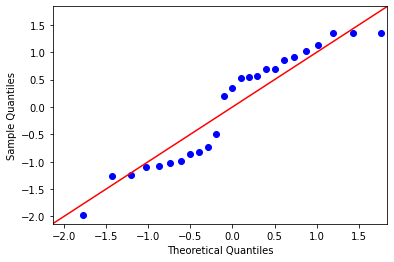

In [ ]:
#define residuals
res = model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

The residuals stray from the 45-degree line a bit, but not enough to cause serious concern. We can assume that the normality assumption is met.